<a href="https://colab.research.google.com/github/JCaballerot/Machine_learning_program/blob/main/Supervised_models/Logistic_regression/Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Automobile Loan Default Dataset
</font></h1>

---

## Introducción

En este laboratorio, aprenderá a usar python para construir un modelo de <b>credit scoring</b>.



## Objetivo de este Notebook

1. Como construir e interpretar un modelo de regresión logística.
2. Descargar y limpiar un Dataset
3. Realizar los pasos necesarios previos a la etapa de modelamiento
4. Entrenar y Testear modelo

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Contexto</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Pre-selección de variables</a>  
4. <a href="#item34">Tratamiento de variables categóricas</a>  
5. <a href="#item34">Tratamiento de variables numéricas</a>  
6. <a href="#item34">Entrenamiento del modelo</a>  

</font>
</div>

## 1. Contexto

Una institución financiera no bancaria (NBFI) o una compañía financiera no bancaria (NBFC) es una institución financiera que no tiene una licencia bancaria completa o no está supervisada por una agencia reguladora bancaria nacional o internacional. NBFC facilita los servicios financieros relacionados con los bancos, como inversión, agrupación de riesgos, ahorros contractuales y corretaje de mercado.

Una NBFI está luchando por marcar ganancias debido a un aumento en los incumplimientos en la categoría de préstamos para vehículos. La empresa tiene como objetivo determinar la capacidad de pago del préstamo del cliente y comprender la importancia relativa de cada parámetro que contribuye a la capacidad del prestatario para pagar el préstamo.



<b>Meta:</b>

El objetivo del problema es predecir si un cliente no cumplirá con el pago del préstamo del vehículo o no. 




<img src="https://storage.googleapis.com/kaggle-datasets-images/1205706/2014650/7a50061003ce0de9839d54ff4673ccf2/dataset-cover.jpg?t=2021-07-04-09-18-01" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Cómo identificaremos a los clientes morosos? </div>


<b>Descripción de datos</b>

El data frame de Automovile Loan tiene 121,856 filas y 40 columnas.


---

Se le proporciona un conjunto de datos anónimos que contiene una gran cantidad de variables. La columna <b>"Default"</b> es la variable a predecir. Es igual a uno para clientes que cayeron en mora y 0 para clientes que no.

La tarea consiste en predecir la probabilidad de que cada cliente del conjunto de prueba sea un cliente moroso.


---


<strong>Puede consultar este [link](https://www.kaggle.com/datasets/saurabhbagchi/dish-network-hackathon) para leer más sobre la fuente de datos Automobile Loan Default.</strong>


## 2. Descargar y limpiar el Dataset

In [402]:
# Importando librerías

import pandas as pd
import seaborn as sns 
import numpy as np


In [403]:
pddf = pd.read_csv('Train_Dataset.csv')
pddf.head()

<ipython-input-403-e4c23cee5900>:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  pddf = pd.read_csv('Train_Dataset.csv')


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [404]:
pddf.replace({'@': None,
              '#': None,
              '##': None, 
              '&': None,
              'x': None,
              '$': None,
              'XNA' : None,
              '#VALUE!': None}, inplace = True)

In [405]:
categorical_features = ['Accompany_Client', 'Client_Income_Type', 
                        'Client_Education', 'Client_Marital_Status', 
                        'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
                        'Client_Occupation', 'Client_Permanent_Match_Tag', 
                        'Client_Contact_Work_Tag', 'Type_Organization',
                        'Car_Owned',
                        'Bike_Owned',
                        'Active_Loan',
                        'House_Own',
                        'Mobile_Tag',
                        'Homephone_Tag',
                        'Workphone_Working']

numerical_features = list(set(pddf.columns.tolist()) - set(categorical_features + ['ID_Days', 'ID', 'Default']))


In [406]:
# convert Series
for col in numerical_features:
  pddf[col] = pd.to_numeric(pddf[col])


In [407]:
#pddf[categorical_features].replace({1.0: '1', 0.0: '0'}, inplace = True)

pddf[categorical_features] = pddf[categorical_features].replace(1.0, '1')
pddf[categorical_features] = pddf[categorical_features].replace(0.0, '0')


In [408]:
# convert Series
pddf[categorical_features] = pddf[categorical_features].astype('object')

### Análisis inicial

<Axes: xlabel='Default', ylabel='count'>

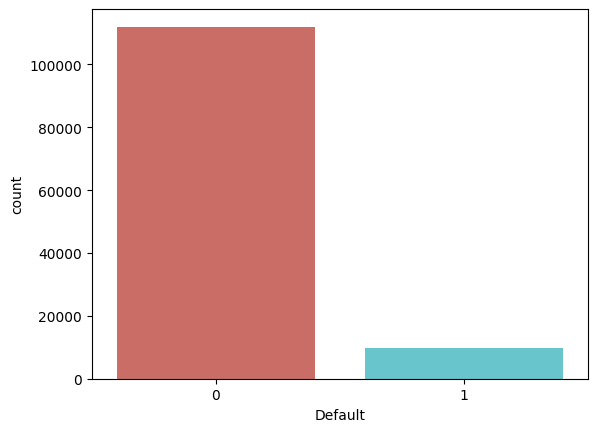

In [409]:
# Analizando el target 
sns.countplot(x='Default', data = pddf, palette = 'hls')

In [410]:
pddf.Default.mean()

0.0807920824579832

In [411]:
#Exploración de variables categóricas
pddf.groupby('House_Own').agg({'Default': 'mean'})

,Default
House_Own,
0,0.081051
1,0.080454


In [412]:
#Exploración de variables numéricas
#sns.regplot(data = pddf, x = 'Client_Income', y = 'Default', fit_reg = False)

## 3. Muestreo 

In [413]:
# Muestreo
from sklearn.model_selection import train_test_split

train, test = train_test_split(pddf, 
                               stratify = pddf['Default'],
                               train_size = 0.7, 
                               random_state = 123)


## 4. Tratamiento de variables

In [414]:
train['Accompany_Client'].value_counts()

Alone       68362
Relative    10857
Partner      3172
Kids          954
Others        669
Group          74
Name: Accompany_Client, dtype: int64

In [415]:
train['Accompany_Client'].drop_duplicates()

66289        Alone
109009    Relative
52595         Kids
53550      Partner
72805          NaN
113076      Others
58543        Group
32663         None
Name: Accompany_Client, dtype: object

### Tratamiento de variables categóricas

In [416]:
#tratamiento de missings
train[categorical_features].fillna('missing', inplace = True)
test[categorical_features].fillna('missing', inplace = True)

<ipython-input-416-63e733a6a00b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[categorical_features].fillna('missing', inplace = True)
<ipython-input-416-63e733a6a00b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[categorical_features].fillna('missing', inplace = True)


In [417]:
train[categorical_features] = train[categorical_features].replace(np.nan, 'missing')
test[categorical_features] = test[categorical_features].replace(np.nan, 'missing')

In [418]:
train[categorical_features] = train[categorical_features].astype('category')
test[categorical_features] = test[categorical_features].astype('category')

In [419]:
train['Accompany_Client'].drop_duplicates()

66289        Alone
109009    Relative
52595         Kids
53550      Partner
72805      missing
113076      Others
58543        Group
Name: Accompany_Client, dtype: category
Categories (7, object): ['Alone', 'Group', 'Kids', 'Others', 'Partner', 'Relative', 'missing']


---

<h3>Label Encoding</h3> 

El label encoding consiste en asignar un número (por lo general entero) a cada una de las categorías de la variable categórica.

<img src="https://miro.medium.com/max/772/1*QQe-4476Oy3_dI1vhb3dDg.png" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">





---

<h3>One Hot Encoding</h3> 

El One hot encoding es un proceso que consiste en dummizar cada catgoría de la variable en una nueva variable, de esta manera las nuevas variables se activarán dependiendo del valor que tome la variable original.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTr11qA6j0WCbEYrfNoQ7QO_NpMIZus42BJwQ&usqp=CAU" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">

---

<div style="text-align: center">Ejemplo de one hot Encoding </div>


In [420]:
train.Loan_Contract_Type.drop_duplicates()

66289         CL
13964    missing
62213         RL
Name: Loan_Contract_Type, dtype: category
Categories (3, object): ['CL', 'RL', 'missing']

In [421]:
train['Loan_Contract_Type'].head(10)

train['dummy_CL'] = train.Loan_Contract_Type.apply(lambda x: 1 if x == 'CL' else 0)
train['dummy_RL'] = train.Loan_Contract_Type.apply(lambda x: 1 if x == 'RL' else 0)
train['dummy_missing'] = train.Loan_Contract_Type.apply(lambda x: 1 if x == 'missing' else 0)

train[['Loan_Contract_Type', 'dummy_CL', 'dummy_RL', 'dummy_missing']].drop_duplicates().head(20)


,Loan_Contract_Type,dummy_CL,dummy_RL,dummy_missing
66289,CL,1,0,0
13964,missing,0,0,1
62213,RL,0,1,0


In [422]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = True, 
                        handle_unknown = 'infrequent_if_exist')

encoder.fit(train[categorical_features])

OneHotEncoder(handle_unknown='infrequent_if_exist')

In [423]:
train[encoder.get_feature_names_out(categorical_features)] = encoder.transform(train[categorical_features]).toarray()
test[encoder.get_feature_names_out(categorical_features)] = encoder.transform(test[categorical_features]).toarray()

<ipython-input-423-8d21445f3b5e>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[encoder.get_feature_names_out(categorical_features)] = encoder.transform(train[categorical_features]).toarray()
<ipython-input-423-8d21445f3b5e>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[encoder.get_feature_names_out(categorical_features)] = encoder.transform(train[categorical_features]).toarray()
<ipython-input-423-8d21445f3b5e>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

In [424]:
train[[x for x in train.columns.tolist() if 'Gender' in x]].head(10)

,Client_Gender,Client_Gender_Female,Client_Gender_Male,Client_Gender_missing
66289,Male,0.0,1.0,0.0
109009,Male,0.0,1.0,0.0
30526,Male,0.0,1.0,0.0
117872,Male,0.0,1.0,0.0
90866,Male,0.0,1.0,0.0
40786,Male,0.0,1.0,0.0
13964,Male,0.0,1.0,0.0
7076,Female,1.0,0.0,0.0
17169,Male,0.0,1.0,0.0
64245,Male,0.0,1.0,0.0



<h3>Target Encoding</h3> 

El target encoding es una técnica que consiste en inputar el promedio del target a cada uno de los valores de la variable categórica.

<img src="https://lh6.googleusercontent.com/6_KrGj2k9NvcLVfmZ6HIYruAqav4rX86YU7WOhXofDGd6-98JjUPWajo0dDqmFMXv3tN0b_LOmgYLiPMCFyIWw3b7lVrCAiSboWgJ_AJ4TqHpNWUHkgIxl0xuSF9JdSXNbWG48QS" alt="HTML5 Icon" style= "width: 500px; height: 350px;">

---


In [425]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [426]:
from category_encoders import TargetEncoder

encoder = TargetEncoder(handle_unknown = 'infrequent_if_exist')
encoder.fit(train[categorical_features].astype('category'), train['Default'])


TargetEncoder(cols=['Accompany_Client', 'Client_Income_Type',
                    'Client_Education', 'Client_Marital_Status',
                    'Client_Gender', 'Loan_Contract_Type',
                    'Client_Housing_Type', 'Client_Occupation',
                    'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
                    'Type_Organization', 'Car_Owned', 'Bike_Owned',
                    'Active_Loan', 'House_Own', 'Mobile_Tag', 'Homephone_Tag',
                    'Workphone_Working'],
              handle_unknown='infrequent_if_exist')

In [427]:

train[[x + '_coded' for x in categorical_features]] = encoder.transform(train[categorical_features].astype('category'))
test[[x + '_coded' for x in categorical_features]] = encoder.transform(test[categorical_features].astype('category'))


In [428]:
train[['Client_Gender', 'Client_Gender_coded']].head(10)

,Client_Gender,Client_Gender_coded
66289,Male,0.070758
109009,Male,0.070758
30526,Male,0.070758
117872,Male,0.070758
90866,Male,0.070758
40786,Male,0.070758
13964,Male,0.070758
7076,Female,0.100146
17169,Male,0.070758
64245,Male,0.070758


### Análisis univariado I

In [429]:
categorical_features_coded = [x + '_coded' for x in categorical_features]

In [430]:
univariate = train[numerical_features + categorical_features_coded].describe(percentiles = [0.05, 0.95]).transpose()
univariate.reset_index(drop = False, inplace = True)

univariate['missing_rate'] = 1 - univariate['count']/len(train)

univariate.rename(columns = {'index' : 'feature',
                             '5%': 'p5',
                             '50%' : 'median',
                             '95%': 'p95'}, inplace = True)
univariate.head()

,feature,count,mean,std,min,p5,median,p95,max,missing_rate
0,Application_Process_Day,83605.0,3.162801,1.758039,0.000000,0.000000,3.00000,6.000000,6.0,0.019860
1,Registration_Days,82748.0,4980.901146,3517.494509,0.000000,331.000000,4496.00000,11365.000000,23738.0,0.029907
2,Score_Source_2,81359.0,0.518766,0.723443,0.000005,0.131249,0.56544,0.748064,100.0,0.046190
3,Child_Count,82807.0,0.415895,0.724959,0.000000,0.000000,0.00000,2.000000,19.0,0.029215
4,Age_Days,82785.0,16030.353482,4367.969719,7676.000000,9416.000000,15736.00000,23204.000000,25201.0,0.029473


In [431]:
# Tratamiento de outliers por percentiles

for col in univariate.feature.tolist():
  desc = univariate.loc[univariate.feature == col]

  lower_limit = desc.p5.values[0]
  upper_limit = desc.p95.values[0]

  train[col + '_t'] = train[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)
  
  test[col + '_t'] = test[col].apply(lambda x: lower_limit if x <= lower_limit else
                                               upper_limit if x >= upper_limit else
                                               x)

In [432]:
univariate.head()

,feature,count,mean,std,min,p5,median,p95,max,missing_rate
0,Application_Process_Day,83605.0,3.162801,1.758039,0.000000,0.000000,3.00000,6.000000,6.0,0.019860
1,Registration_Days,82748.0,4980.901146,3517.494509,0.000000,331.000000,4496.00000,11365.000000,23738.0,0.029907
2,Score_Source_2,81359.0,0.518766,0.723443,0.000005,0.131249,0.56544,0.748064,100.0,0.046190
3,Child_Count,82807.0,0.415895,0.724959,0.000000,0.000000,0.00000,2.000000,19.0,0.029215
4,Age_Days,82785.0,16030.353482,4367.969719,7676.000000,9416.000000,15736.00000,23204.000000,25201.0,0.029473


<ipython-input-433-f01624099e57>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = temp.fillna(temp.mean())
<ipython-input-433-f01624099e57>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))


<Axes: xlabel='Age_Days_t_rango', ylabel='Default'>

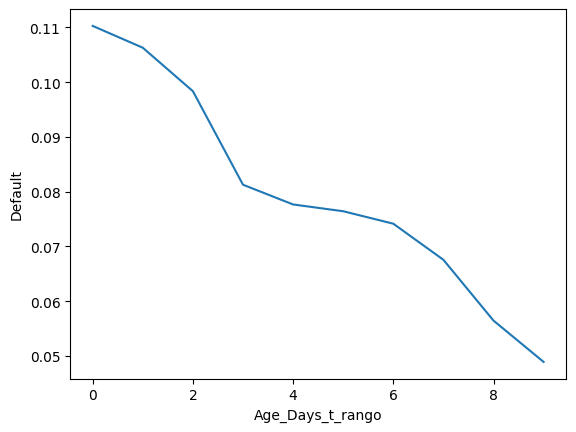

In [433]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

var = 'Age_Days_t'
temp = train.copy()
temp = temp.fillna(temp.mean())
discretizer = KBinsDiscretizer(n_bins = 10, 
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'Default': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'Default')


### Tratamiento de missing

In [434]:
train = train.fillna(train.median())
test  = test.fillna(train.median())

<ipython-input-434-b1ef414424de>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.median())
<ipython-input-434-b1ef414424de>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test  = test.fillna(train.median())


### Pre-selección de variables

In [435]:
from sklearn.metrics import roc_auc_score

dfgini = pd.DataFrame({'feature': numerical_features + categorical_features_coded,
                       'gini': [roc_auc_score(train.Default, train[col])*2-1 for col in numerical_features + categorical_features_coded]})

dfgini['gini_abs'] = dfgini.gini.apply(lambda x: abs(x))

dfgini.sort_values(by = 'gini_abs', ascending = False)


,feature,gini,gini_abs
2,Score_Source_2,-0.295250,0.295250
14,Score_Source_3,-0.281581,0.281581
5,Employed_Days,-0.181642,0.181642
4,Age_Days,-0.153077,0.153077
26,Client_Occupation_coded,0.152761,0.152761
10,Score_Source_1,-0.152179,0.152179
29,Type_Organization_coded,0.151666,0.151666
6,Phone_Change,-0.114764,0.114764
20,Client_Income_Type_coded,0.111633,0.111633
21,Client_Education_coded,0.105465,0.105465


In [436]:
univariate_II = pd.merge(univariate, dfgini, on = 'feature', how = 'left')
univariate_II.sort_values(by = 'gini_abs', ascending = False)


,feature,count,mean,std,min,p5,median,p95,max,missing_rate,gini,gini_abs
2,Score_Source_2,81359.0,0.518766,0.723443,0.000005,0.131249,0.565440,0.748064,100.000000,0.046190,-0.295250,0.295250
14,Score_Source_3,66516.0,0.511120,0.194368,0.000527,0.154744,0.537070,0.786267,0.896010,0.220202,-0.281581,0.281581
5,Employed_Days,82761.0,67160.180641,138977.268774,0.000000,227.000000,2211.000000,365243.000000,365243.000000,0.029754,-0.181642,0.181642
4,Age_Days,82785.0,16030.353482,4367.969719,7676.000000,9416.000000,15736.000000,23204.000000,25201.000000,0.029473,-0.153077,0.153077
26,Client_Occupation_coded,85299.0,0.080786,0.021578,0.049457,0.054551,0.066931,0.110208,0.178506,0.000000,0.152761,0.152761
10,Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.157439,0.503330,0.831425,0.945741,0.564708,-0.152179,0.152179
29,Type_Organization_coded,85299.0,0.080773,0.020209,0.013986,0.055296,0.082820,0.107623,0.152542,0.000000,0.151666,0.151666
6,Phone_Change,82764.0,963.112066,827.365281,0.000000,0.000000,756.000000,2517.000000,4185.000000,0.029719,-0.114764,0.114764
20,Client_Income_Type_coded,85299.0,0.080776,0.015878,0.054581,0.054581,0.094234,0.094234,0.151207,0.000000,0.111633,0.111633
21,Client_Education_coded,85299.0,0.080788,0.017141,0.002874,0.051051,0.091048,0.091048,0.103553,0.000000,0.105465,0.105465


In [440]:
# Aca podemos definir los criterios para seleccionar variables

print('initial features: ' + str(len(univariate_II)))
print('selected features: ' + str(len(univariate_II.loc[(univariate_II.gini_abs >= 0.05) & (univariate_II.missing_rate <= 0.50)])))
final_features = univariate_II.loc[(univariate_II.gini_abs >= 0.05) & (univariate_II.missing_rate <= 0.50)].feature.tolist()

initial features: 37
selected features: 13


### Estandarización

In [442]:
train[[x + '_std' for x in final_features]] = (train[final_features] - train[final_features].mean())/train[final_features].std()
test[[x + '_std' for x in final_features]] = (test[final_features] - train[final_features].mean())/train[final_features].std()

## Regresión logística

In [444]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.Logit(train.Default, sm.add_constant(train[[x + '_std' for x in final_features]]))
res = mod.fit()

print(res.summary())


Optimization terminated successfully.
         Current function value: 0.255905
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                85299
Model:                          Logit   Df Residuals:                    85285
Method:                           MLE   Df Model:                           13
Date:                Sat, 27 May 2023   Pseudo R-squ.:                 0.08829
Time:                        02:59:41   Log-Likelihood:                -21828.
converged:                       True   LL-Null:                       -23942.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.7164      0.016   -171.381    